In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:], group_16_df['Subject']
x.shape, y.shape

((2856, 71), (2856,))

Text(0, 0.5, 'Average Area')

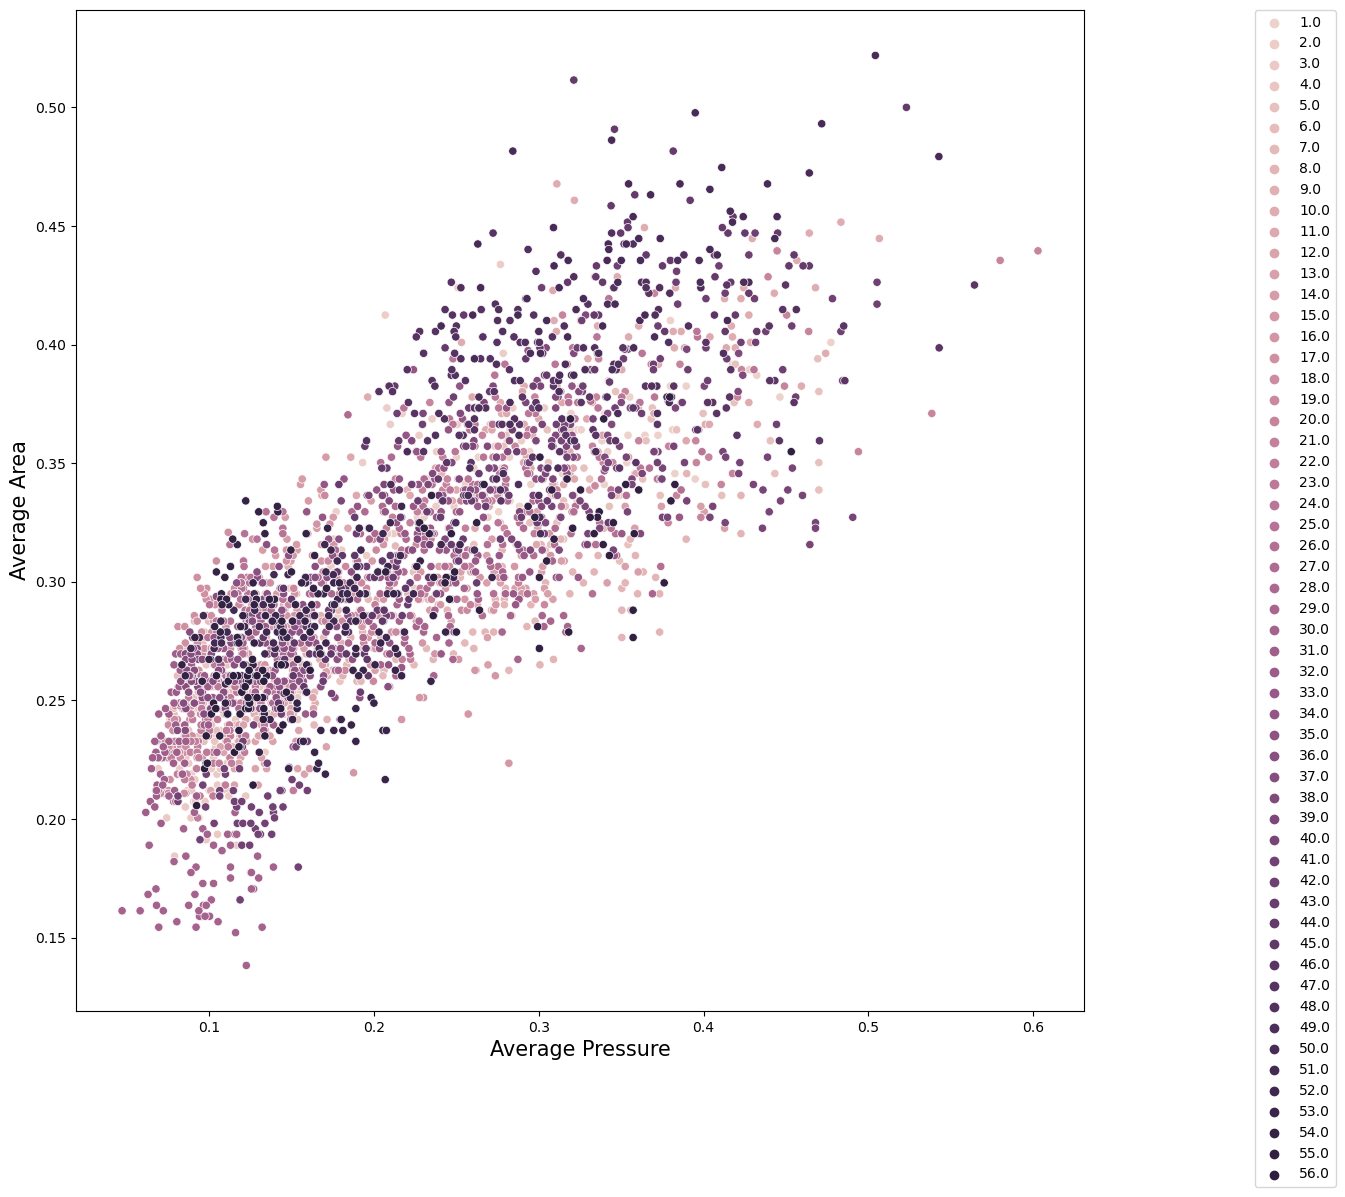

In [5]:
plt.figure(figsize = (13, 13))
sns.scatterplot(data = group_16_df, x = 'AvP', y = 'AvA', hue = 'Subject', legend = 'full')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xlabel('Average Pressure', fontsize=15)
plt.ylabel('Average Area', fontsize=15)

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(group_16_df)
x_scaled = scaler.fit_transform(x)


In [7]:
inertia = []

for k in range(1, 31):
    km = KMeans(n_clusters = k, init = "k-means++", max_iter = 300, n_init = 10)
    km.fit(x)
    inertia.append(km.inertia_)
    
inertia

[10990983639.499949,
 7993173888.227232,
 5952298267.312125,
 5352361995.044298,
 4905749243.964527,
 4547058534.69985,
 4218271946.3889313,
 3953777443.10279,
 3771501566.8788447,
 3632338975.0984917,
 3506903557.708371,
 3389048692.7544384,
 3299606598.94708,
 3192937779.8512907,
 3125689953.876371,
 3045228050.44676,
 2995288416.3660946,
 2908151432.2793593,
 2857976512.549285,
 2820941274.8342757,
 2743775021.699079,
 2708911221.593534,
 2654631859.9965525,
 2609272292.5450873,
 2570519619.3009634,
 2544690331.7574034,
 2490832179.1751847,
 2473435349.461139,
 2435469699.152271,
 2397402407.4417267]

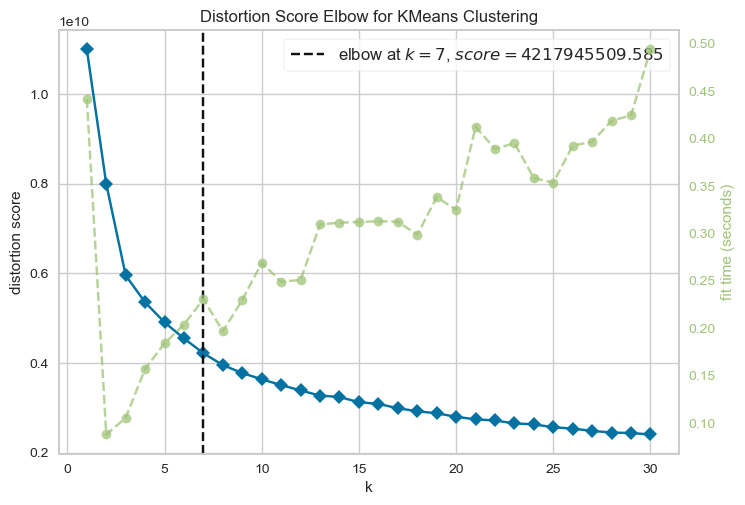

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# !pip install yellowbrick

from  yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state = 222)
visualizer = KElbowVisualizer(km, k = (1, 31))

visualizer.fit(x)
visualizer.show()

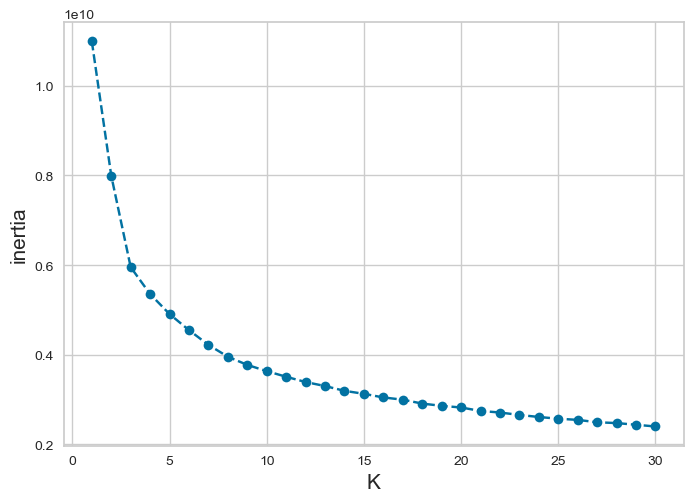

In [9]:
plt.plot(range(1, 31), inertia, 'bo--')
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

In [10]:
kmeans = KMeans(n_clusters = 7, init="k-means++", max_iter=1000, n_init=10).fit(x)
cluster = kmeans.predict(x)
cluster

array([5, 5, 5, ..., 0, 0, 0])

In [11]:
group_16_df['Cluster'] = cluster
group_16_df

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA,Cluster
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018,5
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138,5
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138,5
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138,5
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2906,56.0,79.0,73.0,89.0,72.0,52.0,78.0,67.0,77.00,...,0.225806,0.193548,0.129032,0.177419,0.258065,0.225806,77.714286,0.092229,0.205645,5
2852,2907,56.0,65.0,98.0,73.0,75.0,62.0,67.0,85.0,68.00,...,0.225806,0.225806,0.161290,0.225806,0.177419,0.290323,75.142857,0.133714,0.235023,0
2853,2908,56.0,88.0,85.0,71.0,63.0,104.0,81.0,85.0,80.00,...,0.258065,0.290323,0.322581,0.306452,0.225806,0.258065,77.214286,0.153600,0.267281,0
2854,2909,56.0,99.0,98.0,80.0,95.0,71.0,76.0,70.0,78.00,...,0.225806,0.258065,0.225806,0.193548,0.225806,0.354839,74.714286,0.111429,0.258065,0


In [12]:
kmeans.labels_, kmeans.cluster_centers_

(array([5, 5, 5, ..., 0, 0, 0]),
 array([[9.56097884e+01, 9.04298942e+01, 8.86931217e+01, 8.40568783e+01,
         8.79828042e+01, 8.47023810e+01, 8.71084656e+01, 8.35026455e+01,
         8.47089947e+01, 9.06759259e+01, 8.89232804e+01, 9.59550265e+01,
         8.36190476e+01, 7.30912698e+01, 6.93133598e+02, 4.95779101e+02,
         5.35205026e+02, 1.00290344e+03, 6.98899471e+02, 5.53970899e+02,
         6.94351852e+02, 6.52457672e+02, 1.98625397e+03, 6.15984127e+02,
         6.76800265e+02, 3.34689153e+02, 6.49064815e+02, 5.97041005e+02,
         4.04150794e+02, 4.45623016e+02, 9.19271164e+02, 6.10431217e+02,
         4.69439153e+02, 6.05813492e+02, 5.68861111e+02, 1.90152778e+03,
         5.25038360e+02, 5.87455026e+02, 2.37568783e+02, 5.65821429e+02,
         1.80634929e-01, 1.86330168e-01, 2.01377788e-01, 2.16393661e-01,
         2.17339692e-01, 1.48946039e-01, 2.10933344e-01, 1.40139688e-01,
         1.33644450e-01, 1.89238106e-01, 1.90107945e-01, 1.76419056e-01,
         1.9250159

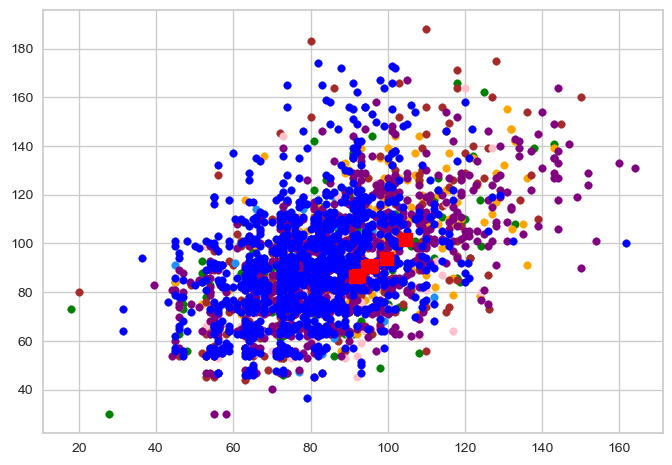

In [13]:
labels = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['green','orange','brown','dodgerblue','pink','purple', 'blue', 'yellow']

for label, color in zip(labels, colors):
    index = group_16_df["Cluster"]==label
    plt.scatter(group_16_df.loc[index, "Hold 5"],
                group_16_df.loc[index, "Hold i"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=100);

In [14]:
kmeans.transform(x)

# measures the distance from each instance to every centroid
# this can be used as a transformation from a high dimensional space to a lower dimensional space

array([[2080.59771689, 2429.49893468, 1273.59600046, ..., 3467.18855021,
         742.10283697,  945.58433677],
       [1869.45740147, 2386.21756031, 1289.84369047, ..., 3356.18640068,
         692.38919766, 1048.10327979],
       [1852.60120568, 2416.85330463, 1707.34681908, ..., 3624.61244992,
         730.66714746,  888.74804882],
       ...,
       [1517.39632475, 2859.08736422, 2416.00991011, ..., 3362.34134157,
        1866.44288175, 2379.73755099],
       [1465.99895085, 2832.88134486, 2674.97465776, ..., 3459.5835538 ,
        2102.17725631, 2660.92469536],
       [1643.53087942, 2818.90265362, 2646.96276588, ..., 3345.25792687,
        2028.46068338, 2586.04997834]])

In [15]:
kmeans.inertia_, kmeans.score(x), silhouette_samples(x, kmeans.labels_), silhouette_score(x, kmeans.labels_)

(4218065218.0801735,
 -4218065218.080173,
 array([-0.0588494 ,  0.02467656, -0.09219969, ...,  0.05260971,
         0.1540248 ,  0.0725745 ]),
 0.21481739442291858)

Text(0, 0.5, 'Silhouette Score')

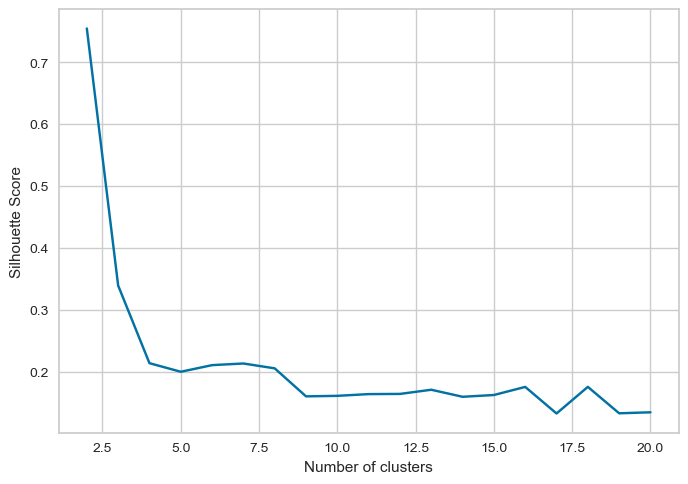

In [16]:
sil = []
kmax = 20

for k in range(2, kmax+1):
    km = KMeans(n_clusters = k).fit(x)
    sil.append(silhouette_score(x, km.labels_, metric = 'euclidean'))
    
plt.plot(range(2,21),sil)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

SilhouetteVisualizer(ax=<AxesSubplot:>,
                     estimator=KMeans(max_iter=1000, n_clusters=7))

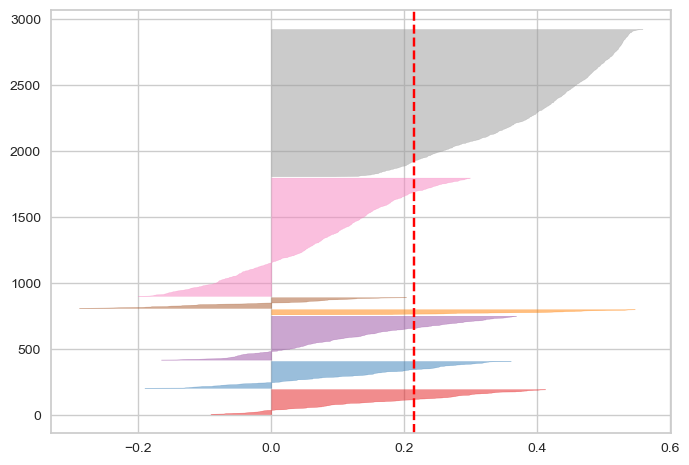

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(x)

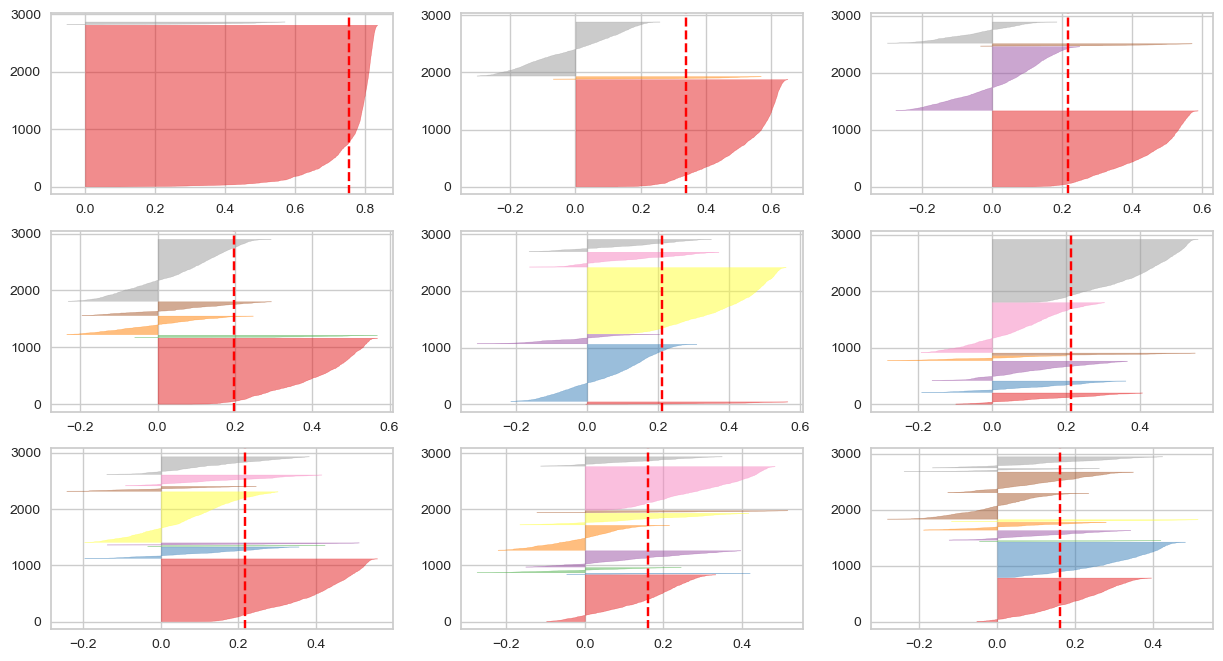

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for k in range(2, 11):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k-2, 3)

    visualizer = SilhouetteVisualizer(km, ax=ax[q][mod])
    visualizer.fit(x)

## PCA

In [19]:
from sklearn.decomposition import PCA

pca_=PCA(n_components=21,random_state=0)
pca_.fit(x)
pca_xnorm=pca_.transform(x)

Text(0.5, 0, 'PCA Comp 2')

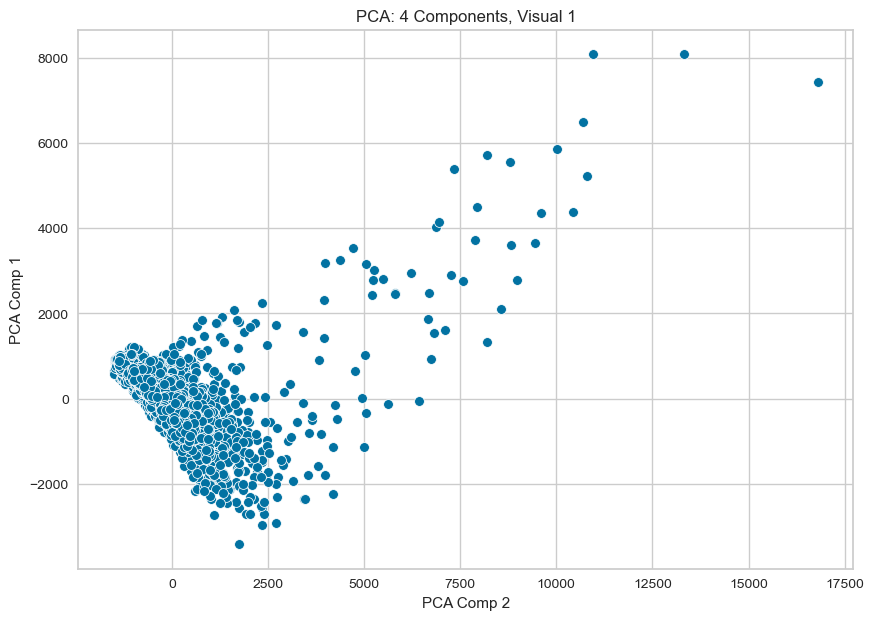

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_xnorm[:,0],y=pca_xnorm[:,1],s=50)
plt.title('PCA: 4 Components, Visual 1') #title
plt.ylabel('PCA Comp 1') #x label
plt.xlabel('PCA Comp 2') #y label

Text(0, 0.5, 'PC 2')

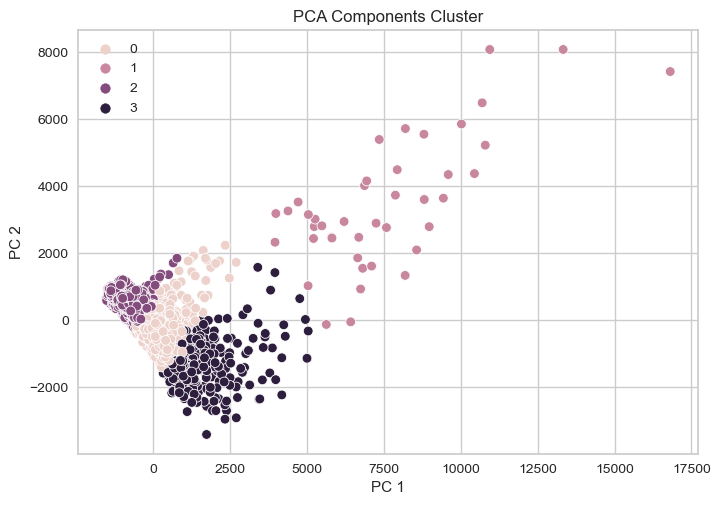

In [21]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=1000, n_init=10).fit(x)
sns.scatterplot(data = pca_xnorm, x=pca_xnorm[:,0],y=pca_xnorm[:,1],hue=kmeans.labels_)
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('PC 1')
# Set y-axis label
plt.ylabel('PC 2')

In [22]:
print(x.head)

<bound method NDFrame.head of       Hold .  Hold t  Hold i  Hold e  Hold Shift  Hold 5  Hold Shift.1  \
0      106.0    92.0   111.0    85.0       123.0    82.0          70.0   
1      106.0    88.0   111.0    83.0       123.0   101.0          81.0   
2      106.0    90.0   111.0    65.0        79.0    73.0          96.0   
3      106.0    81.0   111.0    72.0        83.0    94.0          89.0   
4      106.0    72.0   111.0    82.0        62.0    89.0          68.0   
...      ...     ...     ...     ...         ...     ...           ...   
2851    79.0    73.0    89.0    72.0        52.0    78.0          67.0   
2852    65.0    98.0    73.0    75.0        62.0    67.0          85.0   
2853    88.0    85.0    71.0    63.0       104.0    81.0          85.0   
2854    99.0    98.0    80.0    95.0        71.0    76.0          70.0   
2855    80.0    73.0    97.0    94.0        61.0    65.0          96.0   

      Hold Caps  Hold r  Hold o  ...  Size Caps    Size r    Size o    Size a  \
